### **THỰC HÀNH 3: BIẾN ĐỔI HÌNH HỌC**
#### 1. VIẾT CHƯƠNG TRÌNH BIẾN ĐỔI ẢNH
##### 1.1 Chọn đối tượng trong ảnh

(1427, 2100, 3)


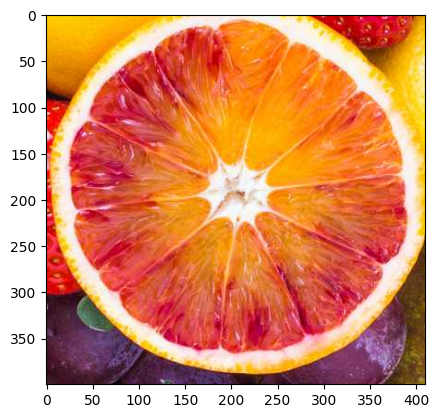

In [2]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('fruit.jpg')
bmg = data[800:1200, 570:980]
print(data.shape)

iio.imsave('orange.jpg', bmg)
plt.imshow(bmg)
plt.show()

#### 1.2 Tịnh tiến đơn

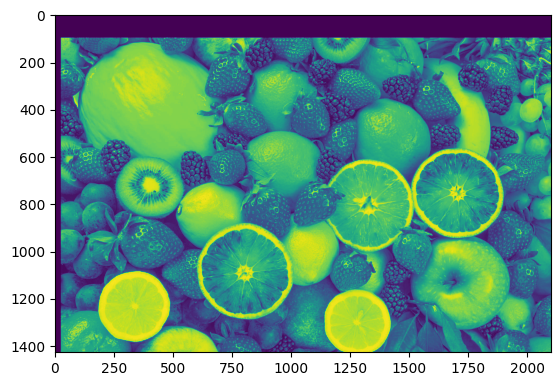

In [5]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg', mode='F')
bdata = nd.shift(data, (100, 25))

plt.imshow(bdata)
plt.show()

#### 1.3 Thay đổi kích thước ảnh

(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)


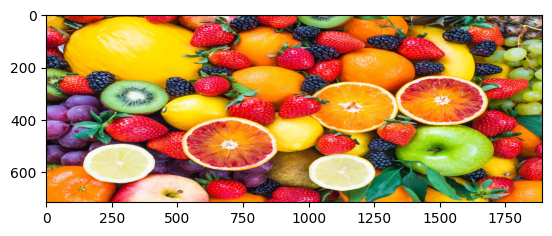

In [6]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
print(data.shape)
bdata = nd.zoom(data, 2)
print(bdata.shape)
data2 = nd.zoom(data, (2, 2, 1))
print(data2.shape)
data3 = nd.zoom(data, (0.5, 0.9, 1))
plt.imshow(data3)
plt.show()

#### 1.4. Xoay ảnh

(1427, 2100, 3)


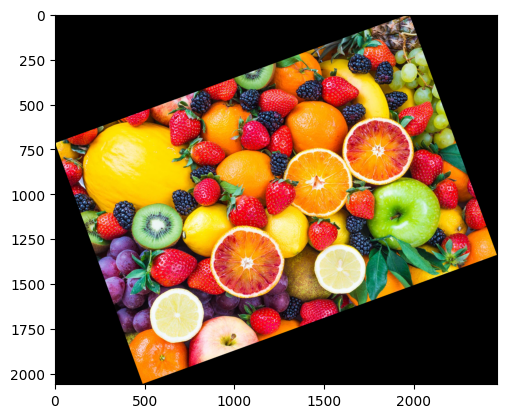

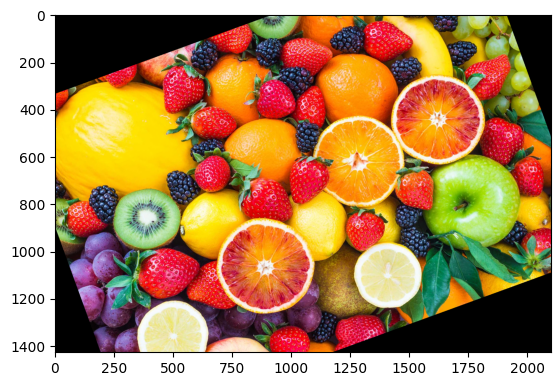

In [7]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
print(data.shape)

d1 = nd.rotate(data, 20)
plt.imshow(d1)
plt.show()

d2 = nd.rotate(data, 20, reshape=False)
plt.imshow(d2)
plt.show()

#### 1.5 Dilation và Erosion

(309, 515)


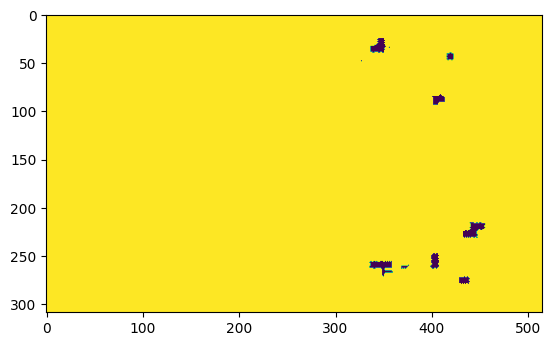

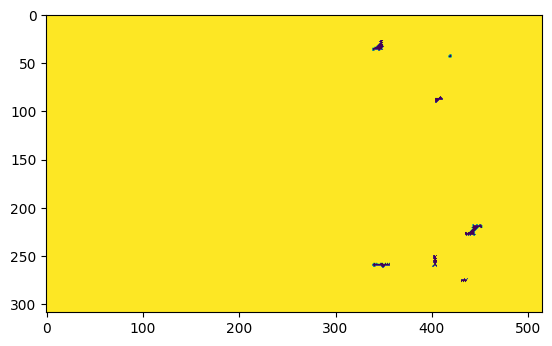

In [8]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('world_cup.jpg', mode="F")
print(data.shape)

d1 = nd.binary_dilation(data)
plt.imshow(d1)
plt.show()

d2 = nd.binary_dilation(data, iterations=3)
plt.imshow(d2)
plt.show()

#### 1.6. Coordinate Mapping

(309, 515)


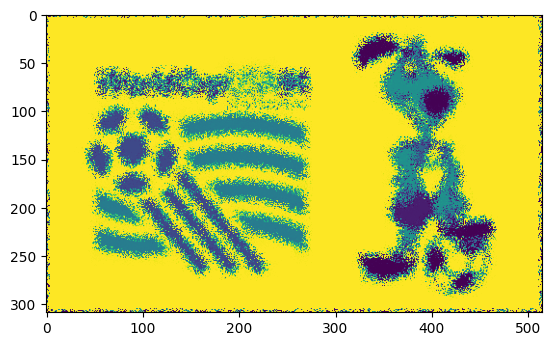

In [10]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('world_cup.jpg', mode="F")
print(data.shape)
V, H = data.shape

M = np.indices((V, H))

d = 5
q = 2 * d * np.random.ranf(M.shape) - d
mp = (M + q).astype(int)
d1 = nd.map_coordinates(data, mp)
plt.imshow(d1)
plt.show()

#### 1.7. Biến đổi chung (Generic Trandformation)

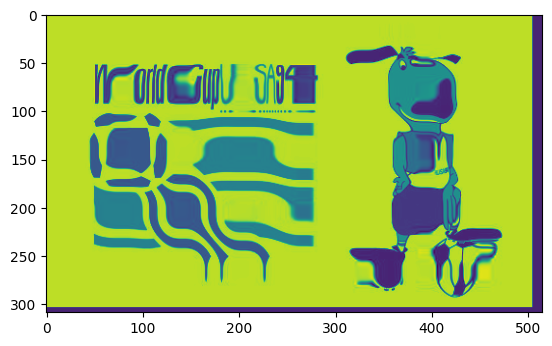

In [11]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

def GeoFun(outcoord):
    a = 10 * np.cos(outcoord[0]/10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1]/10.0) + outcoord[1]
    return a, b

data = iio.imread('world_cup.jpg', mode="F")
d1 = nd.geometric_transform(data, GeoFun)
plt.imshow(d1)
plt.show()

### BÀI TẬP THỰC HÀNH:

#### Bài 1: Chọn ảnh quả kiwi bất kì. Tịnh tiến quả kiwi 50 pixel sang phải và 30 pixel xuống dưới. Áp dụng hiệu ứng sóng (wave effect) lên quả kiwi bằng cách sử dụng biến đổi tọa độ (map_coordinates) với hàm sin. Lưu ảnh kết quả vào file kiwi_wave.jpg

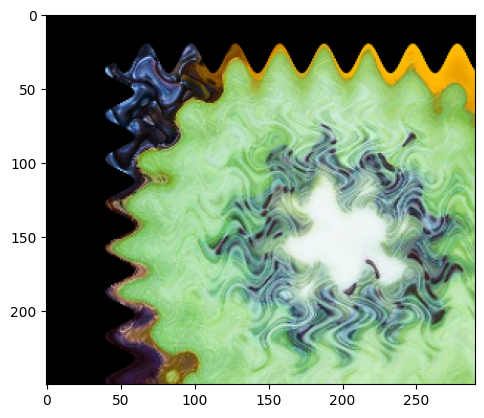

In [14]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
kiwi = data[500:750, 230:520]

kiwi_shifted = nd.shift(kiwi, (30, 50, 0))

rows, cols, ch = kiwi_shifted.shape
X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
X_wave = X + 10 * np.sin(2 * np.pi * Y / 30)
Y_wave = Y + 10 * np.sin(2 * np.pi * X / 30)

kiwi_wave = np.zeros_like(kiwi_shifted)
for c in range(ch):
    kiwi_wave[..., c] = nd.map_coordinates(kiwi_shifted[..., c], [Y_wave, X_wave], order=1, mode='reflect')

iio.imsave('kiwi_wave.jpg', kiwi_wave.astype(np.uint8))

plt.imshow(kiwi_wave.astype(np.uint8))
plt.axis()
plt.show()

#### Bài 2: Chọn quả đu đủ và dưa hấu từ google. Đổi màu đu đủ thành gradient từ đỏ sang xanh lá, và dưa hấu thành gradient từ vàng sang tím. Ghép hai quả lên một nền trong suốt (alpha channel) và lưu dưới dạng PNG.

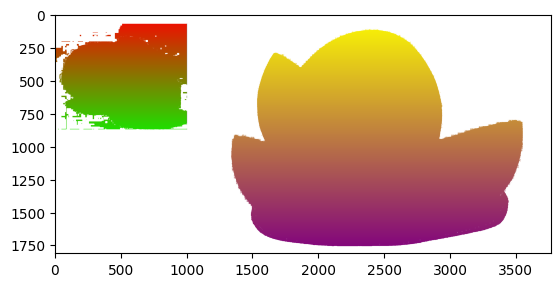

In [22]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

dudu = iio.imread('đu đủ.jpg')
duahau = iio.imread('dưa hấu.jpg')
mask_dudu = np.any(dudu[..., :3] != 255, axis=2)
mask_duahau = np.any(duahau[..., :3] != 255, axis=2)

for i in range(dudu.shape[0]):
    t = i / (dudu.shape[0] - 1)
    color = [255 * (1-t), 255 * t, 0]
    dudu[i, :, :3][mask_dudu[i, :]] = color
for i in range(duahau.shape[0]):
    t = i / (duahau.shape[0] - 1)
    color = [255 * (1-t) + 128 * t, 255 * (1-t), 128 * t]
    duahau[i, :, :3][mask_duahau[i, :]] = color

dudu_rgba = np.dstack([dudu[..., :3], mask_dudu.astype(np.uint8) * 255])
duahau_rgba = np.dstack([duahau[..., :3], mask_duahau.astype(np.uint8) * 255])

H = max(dudu.shape[0], duahau.shape[0])
W = dudu.shape[1] + duahau.shape[1] + 50
canvas = np.zeros((H, W, 4), dtype=np.uint8)
canvas[:dudu.shape[0], :dudu.shape[1], :] = dudu_rgba
canvas[:duahau.shape[0], dudu.shape[1]+50:dudu.shape[1]+50+duahau.shape[1], :] = duahau_rgba

iio.imsave('fruits_composite.png', canvas)
plt.imshow(canvas)
plt.axis()
plt.show()

#### Bài 3: Chọn ảnh núi và thuyền. Xoay cả hai đối tượng 45 độ, giữ kích thước ban đầu (reshape=False). Tạo hiệu ứng phản chiếu dọc (vertical mirror) cho cả hai đối tượng sau khi xoay. Ghép cả hai đối tượng lên một canvas trắng và lưu vào mountain_boat_mirror.jpg

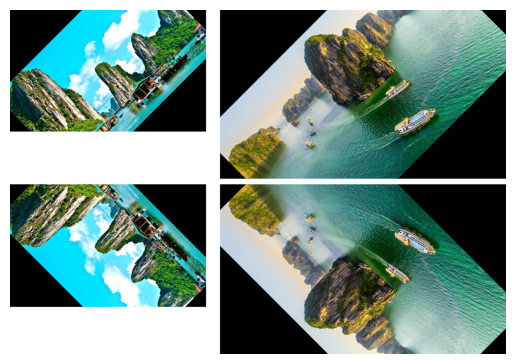

In [24]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pyplot as plt

nui = iio.imread('nui.jpg')
thuyen = iio.imread('thuyen.jpg')
nui_rot = nd.rotate(nui, 45, reshape=False)
thuyen_rot = nd.rotate(thuyen, 45, reshape=False)

nui_mirror = np.flipud(nui_rot)
thuyen_mirror = np.flipud(thuyen_rot)

h = max(nui_rot.shape[0], thuyen_rot.shape[0], nui_mirror.shape[0], thuyen_mirror.shape[0])
w = nui_rot.shape[1] + thuyen_rot.shape[1] + 50
canvas = np.ones((h*2+20, w, 3), dtype=np.uint8) * 255

canvas[:nui_rot.shape[0], :nui_rot.shape[1], :] = nui_rot
canvas[:thuyen_rot.shape[0], nui_rot.shape[1]+50:nui_rot.shape[1]+50+thuyen_rot.shape[1], :] = thuyen_rot
canvas[h+20:h+20+nui_mirror.shape[0], :nui_mirror.shape[1], :] = nui_mirror
canvas[h+20:h+20+thuyen_mirror.shape[0], nui_rot.shape[1]+50:nui_rot.shape[1]+50+thuyen_mirror.shape[1], :] = thuyen_mirror

iio.imsave('mountain_boat_mirror.jpg', canvas)
plt.imshow(canvas)
plt.axis('off')
plt.show()

#### Bài 4: Chọn ngôi chùa bất kì. Phóng to ngôi chùa lên 5 lần. Áp dụng một biến đổi hình học tùy chỉnh (geometric transform) để tạo hiệu ứng "uốn cong" (warping) ngôi chùa. Lưu ảnh kết quả vào pagoda_warped.jpg.

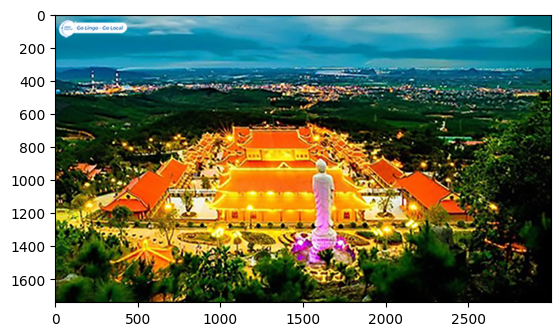

In [3]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

pagoda = iio.imread('pagoda.jpg')
pagoda_zoom = nd.zoom(pagoda, (5, 5, 1))

def warp(coords):
    y, x, c = coords
    offset = 40 * np.sin(2 * np.pi * y / pagoda_zoom.shape[0])
    return y, x + offset, c

pagoda_warped = nd.geometric_transform(
    pagoda_zoom,
    warp,
    output_shape=pagoda_zoom.shape,
    order=1,
    mode='reflect'
)
iio.imsave('pagoda_warped.jpg', pagoda_warped.astype(np.uint8))
plt.imshow(pagoda_warped.astype(np.uint8))
plt.axis()
plt.show()

#### Bài 5: Tạo một chương trình menu tương tác cho phép người dùng chọn các phép biến đổi sau:
 - Tịnh tiến (hỏi số pixel di chuyển theo x và y).
 - Xoay (hỏi góc xoay và chọn reshape=True/False).
 - Phóng to/thu nhỏ (hỏi hệ số zoom).
 - Làm mờ Gaussian (hỏi giá trị sigma).
 - Biến đổi sóng (hỏi biên độ sóng).
 - Người dùng chọn ảnh từ 3 ảnh bất kì

Chọn ảnh:
1. fruit.jpg
2. world_cup.jpg
3. pagoda.jpg

Chọn phép biến đổi:
1. Tịnh tiến
2. Xoay
3. Phóng to/thu nhỏ
4. Làm mờ Gaussian
5. Biến đổi sóng


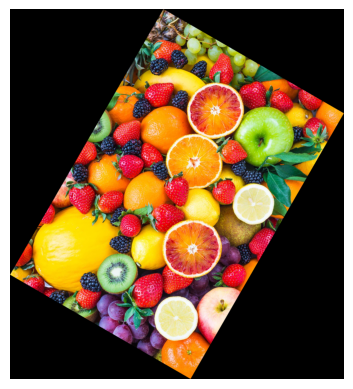

In [4]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pyplot as plt

images = ['fruit.jpg', 'world_cup.jpg', 'pagoda.jpg']
print("Chọn ảnh:")
for i, name in enumerate(images):
    print(f"{i+1}. {name}")
img_idx = int(input("Nhập số thứ tự ảnh: ")) - 1
img = iio.imread(images[img_idx])

print("\nChọn phép biến đổi:")
print("1. Tịnh tiến")
print("2. Xoay")
print("3. Phóng to/thu nhỏ")
print("4. Làm mờ Gaussian")
print("5. Biến đổi sóng")
choice = int(input("Nhập số thứ tự phép biến đổi: "))

if choice == 1:
    dx = int(input("Số pixel dịch theo trục x (phải +, trái -): "))
    dy = int(input("Số pixel dịch theo trục y (xuống +, lên -): "))
    if img.ndim == 3:
        shifted = nd.shift(img, (dy, dx, 0))
    else:
        shifted = nd.shift(img, (dy, dx))
    result = shifted

elif choice == 2:
    angle = float(input("Nhập góc xoay (độ): "))
    reshape = input("Giữ nguyên kích thước? (y/n): ").lower() == 'y'
    result = nd.rotate(img, angle, reshape=not reshape)

elif choice == 3:
    zoom = float(input("Nhập hệ số zoom (>1: phóng to, <1: thu nhỏ): "))
    if img.ndim == 3:
        result = nd.zoom(img, (zoom, zoom, 1))
    else:
        result = nd.zoom(img, zoom)

elif choice == 4:
    sigma = float(input("Nhập giá trị sigma (độ mờ): "))
    if img.ndim == 3:
        result = np.zeros_like(img)
        for c in range(img.shape[2]):
            result[..., c] = nd.gaussian_filter(img[..., c], sigma)
    else:
        result = nd.gaussian_filter(img, sigma)

elif choice == 5:
    amp = float(input("Nhập biên độ sóng: "))
    if img.ndim == 3:
        rows, cols, ch = img.shape
    else:
        rows, cols = img.shape
        ch = 1
        img = img[..., None]
    X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
    X_wave = X + amp * np.sin(2 * np.pi * Y / 30)
    Y_wave = Y + amp * np.sin(2 * np.pi * X / 30)
    result = np.zeros_like(img)
    for c in range(ch):
        result[..., c] = nd.map_coordinates(img[..., c], [Y_wave, X_wave], order=1, mode='reflect')
    if result.shape[2] == 1:
        result = result[..., 0]

else:
    print("Lựa chọn không hợp lệ.")
    result = img

plt.imshow(result.astype(np.uint8))
plt.axis('off')
plt.show()